<a href="https://colab.research.google.com/github/camoragaq/python-uoh/blob/main/biopython_introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introducción a Biopython

1. Primero instalamos la librería (ejecutar cada vez que la utilicemos):

In [ ]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 9.3 MB/s 


2. Una vez instalada, la importamos:

In [ ]:
import Bio

3. Importamos para el manejo de secuencias:

In [ ]:
from Bio.Seq import Seq

Primer ejercicio, haremos el reverso complementario de una secuencia de ADN. Para esto primero guardamos una secuencia en una variable:

In [ ]:
seq1 = Seq("ACGTAGCTACGATCACAGCTA")
rc = seq1.reverse_complement()
print(rc)

TAGCTGTGATCGTAGCTACGT


Ahora transladaremos la secuencia a proteína:

In [ ]:
protein = seq1.translate()
print(protein)

T*LRSQL


Si queremos buscar un patrón en la secuencia:

In [ ]:
print(seq1.count('TACGA'))

1


Enumerando los nucleótidos de nuestra secuencia:

In [ ]:
for i, n in enumerate(seq1):
  print(i, n)

0 A
1 C
2 G
3 T
4 A
5 G
6 C
7 T
8 A
9 C
10 G
11 A
12 T
13 C
14 A
15 C
16 A
17 G
18 C
19 T
20 A


Al igual que usando strings podemos concatenar 2 secuencias:

In [ ]:
seq2=Seq("ATTTGATGGA")
seqs = seq1 + seq2
print(seqs)

ACGTAGCTACGATCACAGCTAATTTGATGGA


Lo mismo si queremos comparar 2 secuencias:

In [ ]:
seq1 == seq2

False

Para chequear el contenido GC en una secuencia:

In [ ]:
from Bio.SeqUtils import GC

print("GC:")
print(GC(seq1))

GC:
47.61904761904762


#Haciendo un arbol filogénetico

En biología, es un diagrama que sirve para representar las relaciones evolutivas entre organismos. El patrón de ramificación sirve para ver como emergieron de un ancestro en común.
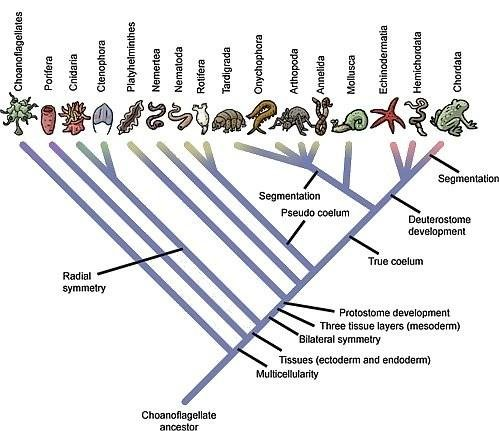


Entonces partimos con:

1. Importamos la librería y los paquetes que utilizaremos:

In [ ]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator 

import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo


2. Importamos las secuencias desde los archivos fasta, cada secuencia es una especie de Tortuga:

In [ ]:
t1 = SeqIO.read("sequence1.fasta", "fasta")
t2 = SeqIO.read("sequence2.fasta", "fasta")
t3 = SeqIO.read("sequence3.fasta", "fasta")
t4 = SeqIO.read("sequence4.fasta", "fasta")
t5 = SeqIO.read("sequence5.fasta", "fasta")
t6 = SeqIO.read("sequence6.fasta", "fasta")
t7 = SeqIO.read("sequence7.fasta", "fasta")
print(t3.description)
t1.id = 'Loggerhead'
t2.id = 'Hawksbill'
t3.id = 'Leatherback'
t4.id = 'Kemp’s Ridley'
t5.id = 'Flatback'
t6.id = 'Green'
t7.id = 'Olive Ridley'

FJ039914.1 Dermochelys coriacea isolate DC_Atlantic 16S ribosomal RNA gene, partial sequence; mitochondrial


3. Escribimos todas las secuencias en un archivo fasta único:

In [ ]:
filo = SeqIO.write([t1,t2,t3,t4,t5,t6,t7], "arbol.fasta", "fasta")

4. Para hacer el árbol debemos hacer primero un alineamiento múltiple de todas las secuencias, para esto ocupamos el programa MUSCLE (https://www.ebi.ac.uk/Tools/msa/muscle/):

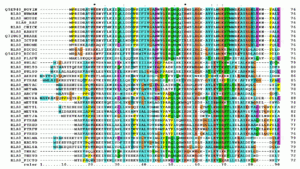

Luego importamos el archivo del alineamiento múltiple generado con clustalw, abrimos e inicializamos el calculador de distancia usando el modelo de identidad:

In [ ]:
with open("arbol.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
#lo guardamos en una matriz
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

<class 'Bio.Align.MultipleSeqAlignment'>
Hawksbill	0
Loggerhead	0.03898305084745768	0
Olive	0.1508474576271186	0.1508474576271186	0
Kemp’s	0.03220338983050852	0.03050847457627115	0.12881355932203387	0
Leatherback	0.07118644067796609	0.07118644067796609	0.18135593220338986	0.06779661016949157	0
Flatback	0.06101694915254241	0.055932203389830515	0.17627118644067796	0.05932203389830504	0.06271186440677967	0
Green	0.1559322033898305	0.15423728813559323	0.12542372881355934	0.15254237288135597	0.14237288135593218	0.12881355932203387	0
	Hawksbill	Loggerhead	Olive	Kemp’s	Leatherback	Flatback	Green


5. Ahora creamos e iniciamos el constructor del árbol:

In [ ]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
#construimos el arbol
filo_tree = constructor.build_tree(alignment)
filo_tree.rooted = True
print(filo_tree)

Phylo.write(filo_tree, "filo_tree.xml", "phyloxml")

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.00021186440677970625, name='Inner4')
            Clade(branch_length=0.011016949152542345, name='Inner3')
                Clade(branch_length=0.005014124293785317, name='Inner2')
                    Clade(branch_length=0.025953389830508468, name='Flatback')
                    Clade(branch_length=0.036758474576271204, name='Leatherback')
                Clade(branch_length=0.05812146892655364, name='Inner1')
                    Clade(branch_length=0.057288135593220366, name='Green')
                    Clade(branch_length=0.06813559322033898, name='Olive')
            Clade(branch_length=0.02012711864406782, name='Hawksbill')
        Clade(branch_length=0.01843220338983049, name='Loggerhead')
        Clade(branch_length=0.012076271186440661, name='Kemp’s')


1

6. Importamos matplotlib y creamos un árbol básico: 

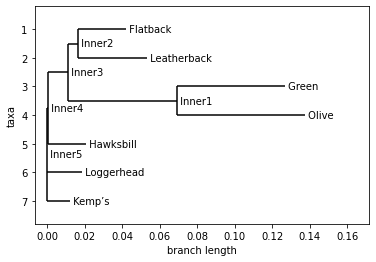

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(filo_tree)

7. Usando matplotlib podemos usar más opciones:

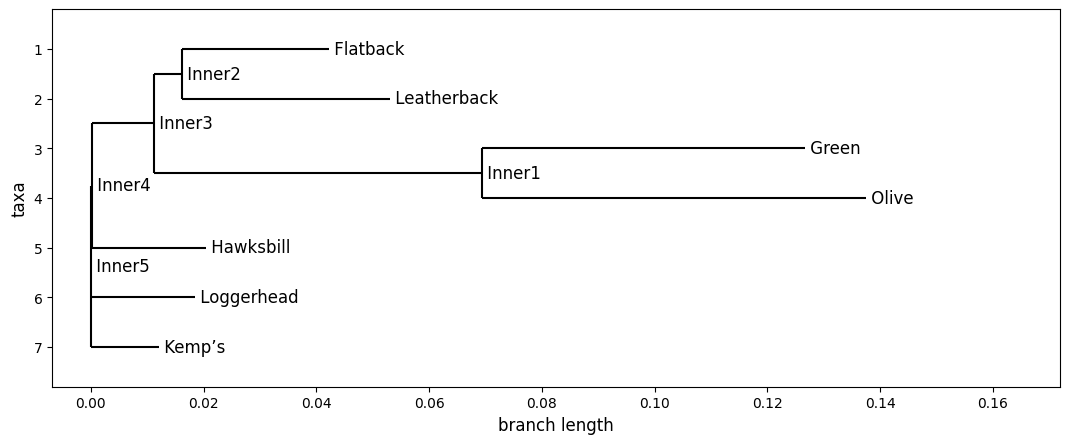

In [ ]:

fig = plt.figure(figsize=(13, 5), dpi=100) # crea la figura y fija el tamaño
matplotlib.rc('font', size=12)              # tamaño fuente de los nombres
matplotlib.rc('xtick', labelsize=10)       # tamaño fuente del eje x
matplotlib.rc('ytick', labelsize=10)       # tamaño fuente del eje y
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(filo_tree, axes=axes)
fig.savefig("filogenetic_cladogram")